## Importing the Dependencies

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as ple
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

## Data Collection & Processing

In [11]:
#loading the calories data from a csv file to a pandas DataFrame
calories = pd.read_csv("calories.csv")

print(f"{calories.shape = }")

#print the first 5 rows of the calories dataFrame
calories.head()

calories.shape = (15000, 2)


,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [13]:
#loading the exercise data from a csv file to a pandas DataFrame
exercise_data = pd.read_csv("exercise.csv")

print(f"{exercise_data.shape = }")

#print the first 5 rows of the exercise_data dataFrame
exercise_data.head()

exercise_data.shape = (15000, 8)


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


### Combining the two dataFrames

In [16]:
calories_data = pd.concat([exercise_data, calories["Calories"]], axis=1)

print(f"{calories_data.shape = }")

calories_data.head()

calories_data.shape = (15000, 9)


,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [18]:
#getting some information about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [20]:
#checking for the missing values
calories_data.isnull().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

#### From above we can se that we do not have any missing values in our data

## Data Analysis:

In [21]:
#get some statistical measures about the data
calories_data.describe()

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


## Data Visualization

In [22]:
sns.set()

<Axes: xlabel='count', ylabel='Gender'>

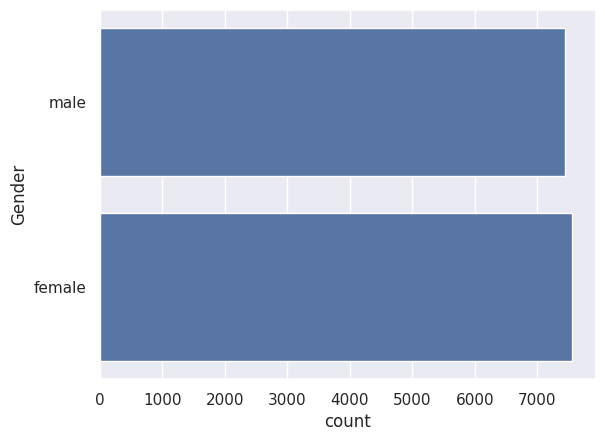

In [24]:
#plotting the gender column in count plot
sns.countplot(calories_data["Gender"])

From above it is clear that the data is euqally distributed in Males and Females

<Axes: xlabel='Age', ylabel='Density'>

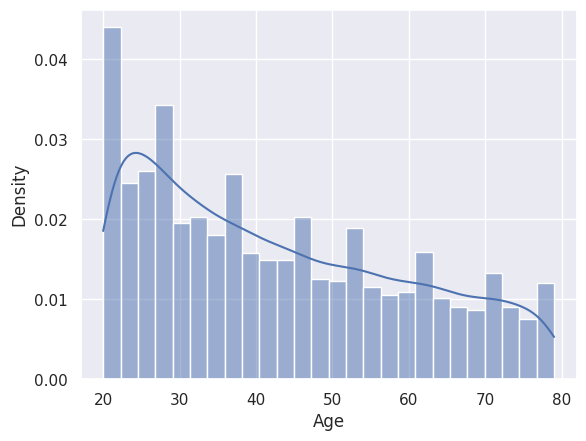

In [31]:
#finding the the distribution of "Age" Column
sns.histplot(calories_data["Age"], kde = True, stat = "density")

##### More people do workouts in the age of 20-30 which decreases with age

<Axes: xlabel='Height', ylabel='Density'>

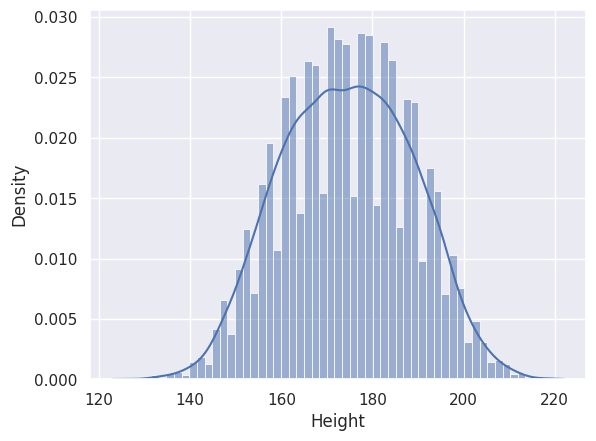

In [32]:
#finding the the distribution of "Height" Column
sns.histplot(calories_data["Height"], kde = True, stat = "density")

##### One can see almost a normal distribution in the heights column

<Axes: xlabel='Weight', ylabel='Density'>

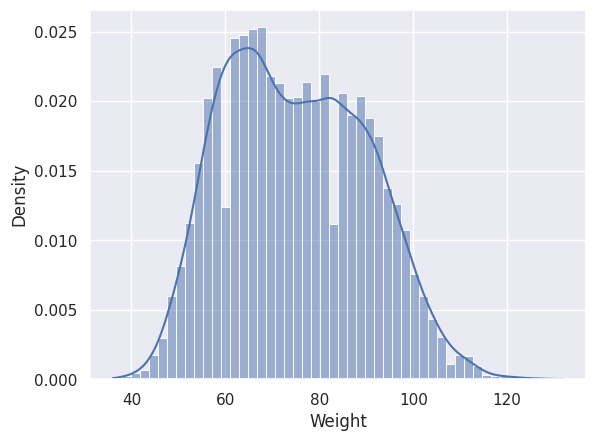

In [33]:
#finding the the distribution of "Weight" Column
sns.histplot(calories_data["Weight"], kde = True, stat = "density")

<Axes: xlabel='Duration', ylabel='Density'>

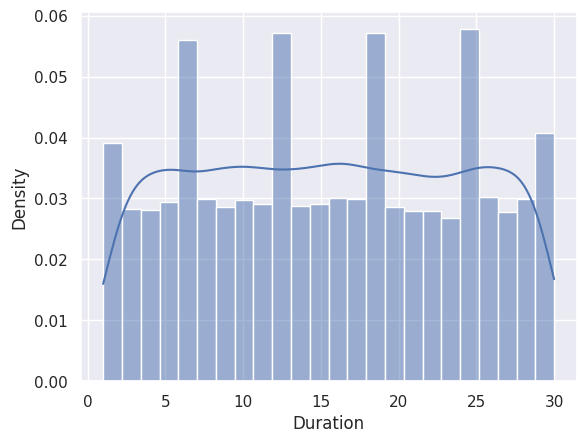

In [34]:
#finding the the distribution of "Duration" Column
sns.histplot(calories_data["Duration"], kde = True, stat = "density")

<Axes: xlabel='Heart_Rate', ylabel='Density'>

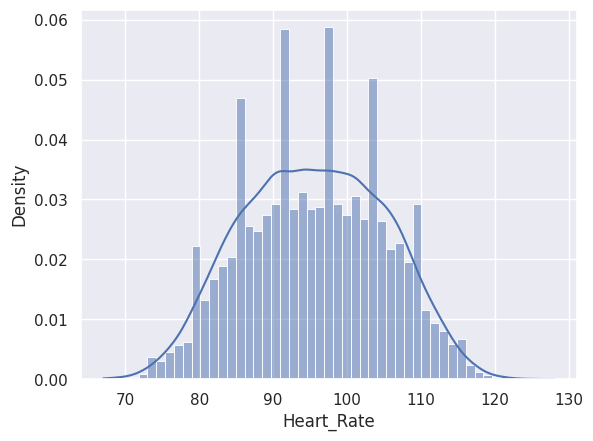

In [35]:
#finding the the distribution of "Heart_Rate" Column
sns.histplot(calories_data["Heart_Rate"], kde = True, stat = "density")

<Axes: xlabel='Body_Temp', ylabel='Density'>

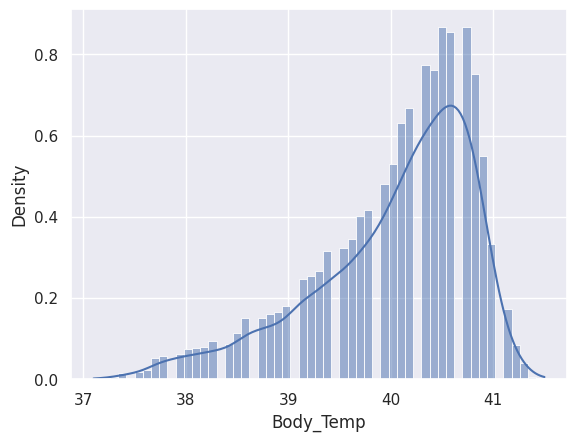

In [36]:
#finding the the distribution of "Body_Temp" Column
sns.histplot(calories_data["Body_Temp"], kde = True, stat = "density")

<Axes: xlabel='Calories', ylabel='Density'>

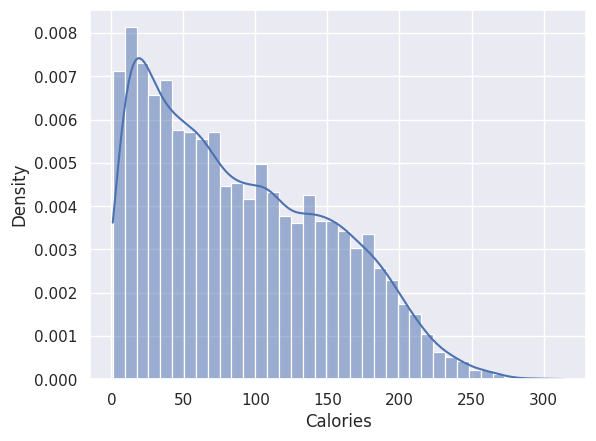

In [37]:
#finding the the distribution of "Calories" Column
sns.histplot(calories_data["Calories"], kde = True, stat = "density")

## Finding the correlation in the dataset

In [47]:
numeric_data = calories_data.drop(["Gender"], axis= 1)
correlation = numeric_data.corr()
correlation

,User_ID,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
User_ID,1.000000,-0.001827,-0.013520,-0.011603,-0.002751,-0.000457,0.000923,-0.001661
Age,-0.001827,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,-0.013520,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,-0.011603,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,-0.002751,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,-0.000457,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.000923,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,-0.001661,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


<Axes: >

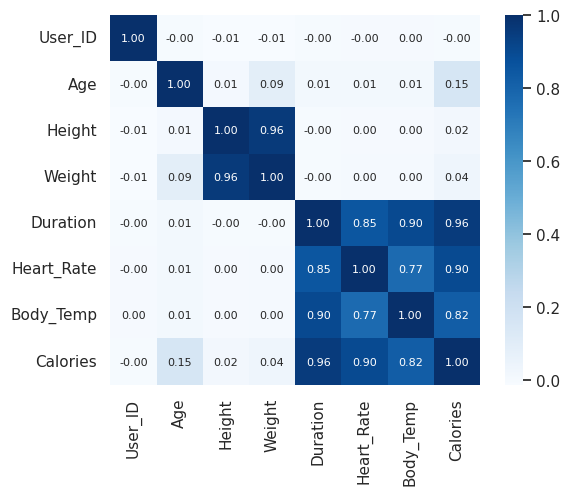

In [46]:
sns.heatmap(correlation, cbar = True, square=True, fmt=".2f", annot=True, annot_kws={"size": 8}, cmap="Blues")

In [50]:
#converting the text data to numerical values
calories_data.replace({"Gender":{"male":0, "female": 1}}, inplace=True)

calories_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,0,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,1,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,0,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,1,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,1,27,154.0,58.0,10.0,81.0,39.8,35.0


### Separating features and target

In [54]:
X = calories_data.drop(columns=["User_ID", "Calories"], axis=1)
X.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,0,68,190.0,94.0,29.0,105.0,40.8
1,1,20,166.0,60.0,14.0,94.0,40.3
2,0,69,179.0,79.0,5.0,88.0,38.7
3,1,34,179.0,71.0,13.0,100.0,40.5
4,1,27,154.0,58.0,10.0,81.0,39.8


In [55]:
y = calories_data["Calories"]
y.head()

0    231.0
1     66.0
2     26.0
3     71.0
4     35.0
Name: Calories, dtype: float64

### Splitting the data in training data and test data

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)
print(f"{X_train.shape = }")
print(f"{y_train.shape = }")

print(f"{X_test.shape = }")
print(f"{y_test.shape = }")

X_train.shape = (12000, 7)
y_train.shape = (12000,)
X_test.shape = (3000, 7)
y_test.shape = (3000,)


#### Model Training using XGBoost Regressor

In [58]:
#loading the model
model = XGBRegressor()

In [59]:
#training the model with X_train
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

##### Evaluation of Model

In [62]:
test_data_predictions = model.predict(X_test)
test_data_predictions

array([125.58828 , 222.11377 ,  38.725952, ..., 144.3179  ,  23.425894,
        90.100494], dtype=float32)

In [67]:
#comparing the predictions with the ground truth values to evaluate the model
mean_abs_err = metrics.mean_absolute_error(y_test,test_data_predictions)
print(f"{mean_abs_err = }")

mean_abs_err = 1.4833678883314132


In [68]:
input_data = (1,30,166.0,60.0,30.0,94.0,40.3)
data_to_nparray = np.array(input_data)
reshape_data = data_to_nparray.reshape(1,-1)
predict = model.predict(reshape_data)
print("Calories brunt :", predict)

Calories brunt : [147.95541]
